# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Inputing the data and reading the data

In [2]:
input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/'
training_data_file = 'CyberBullying_Comments_Dataset.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


Splitting the data

In [3]:
from sklearn.model_selection import train_test_split

X = df['Text'].copy()
y = df['CB_Label'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

Next we're going to vectorize the data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (8880, 15603)


numpy.ndarray

Now its time to implement a baseline model to the data.  For right now we'll use RandomForestClassifier to get a baseline view of how the data will work

accuracy (on y_train): 0.9979


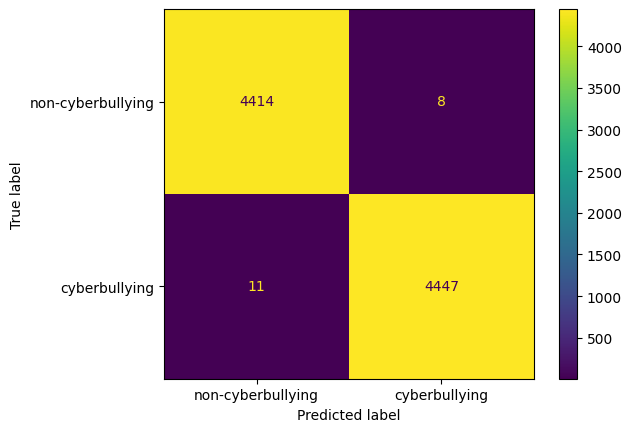

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_estimators=25)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['non-cyberbullying', 'cyberbullying'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

Checking to make sure the validation data looks like what we expect it to be

In [6]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (2220, 15603)


numpy.ndarray

accuracy (on y_val): 0.7374


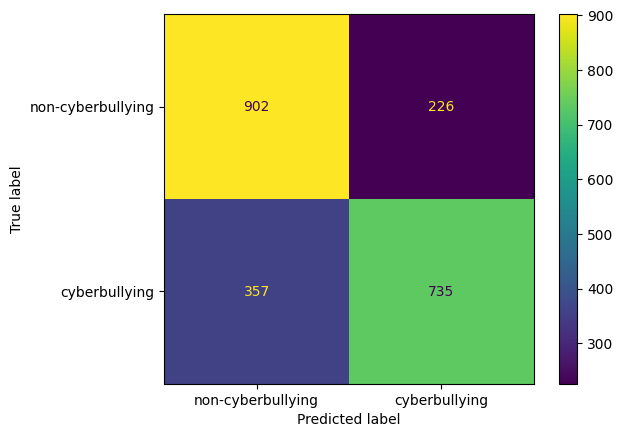

In [7]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['non-cyberbullying','cyberbullying'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

So our accuracy for this model is pretty bad with the model having an accuracy of 74-75%.  Let's see if we can find a hyperparameter that can tune this model to be more accurate.

In [8]:
tune_model = True

In [9]:
"""
from sklearn.metrics import log_loss

def tuneModel(hyperparam_value):
    rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)
    #rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_val)
    y_val_pred = rf_model.predict(X_val)
    train_loss = log_loss(y_train, y_train_pred_prob, labels=['non-cyberbullying', 'cyberbullying'])
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_val, y_val_pred_prob, labels=['non-cyberbullying', 'cyberbullying'])
    val_acc = accuracy_score(y_val, y_val_pred)
    return (train_loss, val_loss, train_acc, val_acc)

# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)
hyp_param_vals = list(range(10,261,50)) # good values for n_estimators
#hyp_param_vals = [2,3] + list(range(5, 50, 10)) # good values for min_samples_split
metrics = []

if tune_model:
    for hp in hyp_param_vals:
        metrics.append(tuneModel(hp))
"""

"\nfrom sklearn.metrics import log_loss\n\ndef tuneModel(hyperparam_value):\n    rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)\n    #rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1)\n    rf_model.fit(X_train, y_train)\n    y_train_pred_prob = rf_model.predict_proba(X_train)\n    y_train_pred = rf_model.predict(X_train)\n    y_val_pred_prob = rf_model.predict_proba(X_val)\n    y_val_pred = rf_model.predict(X_val)\n    train_loss = log_loss(y_train, y_train_pred_prob, labels=['non-cyberbullying', 'cyberbullying'])\n    train_acc = accuracy_score(y_train, y_train_pred)\n    val_loss = log_loss(y_val, y_val_pred_prob, labels=['non-cyberbullying', 'cyberbullying'])\n    val_acc = accuracy_score(y_val, y_val_pred)\n    return (train_loss, val_loss, train_acc, val_acc)\n\n# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)\nhyp_param_vals = list(range(10,261,50)) # good values for n_estimators\n#

Plot the results of the model's performance for each hyperparameter value

In [10]:
"""
import matplotlib.pyplot as plt

if tune_model:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

    ax1.set_xticks(hyp_param_vals)
    ax1.set(xlabel="n_estimators", ylabel="loss (lower is better)")
    ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validation loss
    ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
    ax1.legend(["Validation Loss", "Train Loss"], loc=1)

    ax2.set_xticks(hyp_param_vals)
    ax2.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
    ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validation accuracy
    ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
    ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=1)

"""

'\nimport matplotlib.pyplot as plt\n\nif tune_model:\n    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))\n\n    ax1.set_xticks(hyp_param_vals)\n    ax1.set(xlabel="n_estimators", ylabel="loss (lower is better)")\n    ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], \'--ro\') # validation loss\n    ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], \'--bo\') # training loss\n    ax1.legend(["Validation Loss", "Train Loss"], loc=1)\n\n    ax2.set_xticks(hyp_param_vals)\n    ax2.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")\n    ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], \'--ro\') # validation accuracy\n    ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], \'--bo\') # training accuracy\n    ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=1)\n\n'